# IOT Project EDA Rest Workflow Context Porting Example

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Initializing development to 'local'
development = 'local'

In [3]:
#Initialize and Start Execution
from fire_notebook.output.workflowcontext import RestWorkflowContext
import sys

In [4]:
# Read CSV using pandas
df = pd.read_csv("IoTEnergySolutionsEDA.csv")

In [5]:
# Cast 'timestamp' to pandas datetime
df['timestamp'] = pd.to_datetime(df['timestamp'])

# Extract time fields (hour, minute, second)
df['timestamp_hour'] = df['timestamp'].dt.hour
df['timestamp_minute'] = df['timestamp'].dt.minute
df['timestamp_second'] = df['timestamp'].dt.second
# Extract year and month
df['year'] = df['timestamp'].dt.year
df['month'] = df['timestamp'].dt.month

# Create concatenated 'Time' column
df['Time'] = df['timestamp_hour'].astype(str) + ':' + df['timestamp_minute'].astype(str) + ':' + df['timestamp_second'].astype(str)

In [35]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30288 entries, 0 to 30287
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Unnamed: 0          30288 non-null  object        
 1   device_id           30288 non-null  object        
 2   timestamp           30288 non-null  datetime64[ns]
 3   energy_generation   30288 non-null  float64       
 4   energy_consumption  30288 non-null  float64       
 5   voltage             30288 non-null  float64       
 6   current             30288 non-null  float64       
 7   power               30288 non-null  float64       
 8   frequency           30288 non-null  float64       
 9   timestamp_hour      30288 non-null  int32         
 10  timestamp_minute    30288 non-null  int32         
 11  timestamp_second    30288 non-null  int32         
 12  year                30288 non-null  int32         
 13  month               30288 non-null  int32     

In [7]:
#IOT had only one parameter passed from App to workflow/Notebook for filetering devices
#Additional parameter to be added to the App ---> selectParameter
#If development environment is local, initializing custom parameter to 'selectDevices'
#selectParameter_values = ['energy_generation', 'energy_consumption', 'voltage', 'current', 'power', 'frequency']
parameter_from_App = ['selectDevice', 'selectParameter']
if development == 'local':
    parameters_custom = parameter_from_App[0]+'='+'meter_2'+parameter_from_App[1]+'='+'energy_generation'
    parameters_list = ["placeholder", "http://localhost", "default_job_id", parameters_custom]
else:
    parameters_list = sys.argv

In [8]:
#Creating an instance of the RestWorkflowContext class
restworkflowcontext = RestWorkflowContext(parameters=parameters_list)

In Debug Mode!


In [9]:
#Initializing the value of the parameter from the App using getParameters API
#custom_parameters = "param1=value1,param2=value2,param3=value3
device_id = restworkflowcontext.getParmeters(parameter_name=parameter_from_App[0], default="meter_2")
graph_param = restworkflowcontext.getParmeters(parameter_name=parameter_from_App[1], default="energy_generation")
print('parameter[0] = ',device_id, ',','parameter[1] = ',graph_param)

parameter[0] =  meter_2 , parameter[1] =  energy_generation


In [10]:
# Print the first few rows to ensure data was read correctly
restworkflowcontext.outPandasDataframe("IoT Energy DF", df, 10)

Unnamed: 0   device_id                  timestamp  \
0  2024-05-06 06:40:08.564218     meter_1 2024-05-06 06:40:08.564218   
1  2024-05-23 20:23:08.564218  inverter_1 2024-05-23 20:23:08.564218   
2  2024-05-18 07:45:08.564218  inverter_2 2024-05-18 07:45:08.564218   
3  2024-05-09 02:27:08.564218    feeder_2 2024-05-09 02:27:08.564218   
4  2024-05-21 17:45:08.564218  inverter_1 2024-05-21 17:45:08.564218   
5  2024-05-22 14:07:08.564218  inverter_1 2024-05-22 14:07:08.564218   
6  2024-05-06 22:35:08.564218    feeder_2 2024-05-06 22:35:08.564218   
7  2024-05-21 07:08:08.564218     meter_1 2024-05-21 07:08:08.564218   
8  2024-05-24 12:26:08.564218    feeder_1 2024-05-24 12:26:08.564218   
9  2024-05-14 01:32:08.564218    feeder_1 2024-05-14 01:32:08.564218   

   energy_generation  energy_consumption     voltage    current     power  \
0        1123.210373          494.681261  236.048962  15.864713  3.744849   
1        1066.797997          627.334883  225.456734  17.117452  3.859245   
2        1186.017378          474.536132  228.077307  18.008083  4.107235   
3         663.153481         1149.668987  231.905493  16.429822  3.810166   
4        1288.017073          713.293964  237.415193  15.718316  3.731767   
5         789.629306          812.675001  237.053542  17.270370  4.094002   
6        1253.843225          854.924186  234.284883  13.316824  3.119931   
7        1481.179953          955.520222  224.395229  14.826001  3.326884   
8        1367.147375          760.315369  225.526236  12.890107  2.907057   
9         890.412343         1162.726503  231.820958  14.744924  3.418182   

   frequency  timestamp_hour  timestamp_minute  timestamp_second  year  month  \
0  49.957245               6                40                 8  2024      5   
1  50.134670              20                23                 8  2024      5   
2  50.309103               7                45                 8  2024      5   
3  49.728553               2                27                 8  2024      5   
4  50.249790              17                45                 8  2024      5   
5  49.998526              14                 7                 8  2024      5   
6  50.094381              22                35                 8  2024      5   
7  50.231828               7                 8                 8  2024      5   
8  50.431188              12                26                 8  2024      5   
9  49.643623               1                32                 8  2024      5   

      Time  
0   6:40:8  
1  20:23:8  
2   7:45:8  
3   2:27:8  
4  17:45:8  
5   14:7:8  
6  22:35:8  
7    7:8:8  
8  12:26:8  
9   1:32:8

# ---- Data Visualizations ----

In [11]:

import plotly.graph_objs as go
import plotly.io as pio
import plotly
import plotly.offline as py

In [12]:
# Exploring IOT Energy Data - EDA html page
htmlstr1 = '''<div style="border-radius: 5px;">
    <div style="padding: 0.75rem 1.25rem; margin-bottom: 0; background-color: #0c9a86;
    border-bottom: 1px solid rgba(30, 30, 30, 0.125); border-top-right-radius: 5px; border-top-left-radius: 5px;
    color: #ffffff; font-family: sans-serif;">
        <h3 style="color: #fff; margin: 0;">Exploring IOT Energy Data</h3>
    </div>
    <div style="margin-top: 20px;"></div>
</div>

<div style="margin-top: 20px;">
    <h4 style="color: #3178d6;">Overview</h4>
    <ul style="margin-left: 10px; list-style-type: none; padding: 0;">
        <li style="position: relative; margin-bottom: 10px; padding-left: 40px;">
            <span style="width: 18px; height: 18px; background-color: #0c9a86; color: #fff; border-radius: 50%; position: absolute; left: 10px; display: flex; align-items: center; justify-content: center; font-size: 20px; font-weight: 600;">+</span>
            Users can analyze IoT data by computing summary statistics to understand metrics like energy generation and consumption across devices. They can visualize these metrics using histograms to explore their distributions and frequencies. Box plots help identify outliers and compare metric distributions across different devices, aiding in anomaly detection and trend analysis.
        </li>
    </ul>
</div>'''

restworkflowcontext.outHTML(title="Exploring IOT Energy Data", text=htmlstr1)

In [13]:
#Actions
htmlstr2 ='''<div style="margin-top: 20px;">
    <h4 style="color: #3178d6;">Actions</h4>
    <ul style="margin-left: 10px; list-style-type: none; padding: 0;">
        <!-- Action 1 -->
        <li style="position: relative; margin-bottom: 10px; padding-left: 40px;">
            <span style="width: 18px; height: 18px; background-color: #0c9a86; color: #fff; border-radius: 50%; position: absolute; left: 10px; display: flex; align-items: center; justify-content: center; font-size: 20px; font-weight: 600;">+</span>
            Select a Device for which Energy Generation and Energy Consumption graph has to be plotted.
        </li>
        <!-- Action 2 -->
        <li style="position: relative; margin-bottom: 10px; padding-left: 40px;">
            <span style="width: 18px; height: 18px; background-color: #0c9a86; color: #fff; border-radius: 50%; position: absolute; left: 10px; display: flex; align-items: center; justify-content: center; font-size: 20px; font-weight: 600;">+</span>
            Select one or multiple Devices under the Select Device.
        </li>
        <!-- Action 3 -->
        <li style="position: relative; margin-bottom: 10px; padding-left: 40px;">
            <span style="width: 18px; height: 18px; background-color: #0c9a86; color: #fff; border-radius: 50%; position: absolute; left: 10px; display: flex; align-items: center; justify-content: center; font-size: 20px; font-weight: 600;">+</span>
            Click on 'Explore Data' to perform the analysis.
        </li>
    </ul>
</div>'''
restworkflowcontext.outHTML(title="Exploring IOT Energy Data", text=htmlstr2)

In [14]:
#Output
htmlstr3 = '''<div style="margin-top: 20px;">
    <h4 style="color: #3178d6;">Outputs</h4>
    <ul style="margin-left: 10px; list-style-type: none; padding: 0;">
        <!-- Output 1 -->
        <li style="position: relative; margin-bottom: 10px; padding-left: 40px;">
            <span style="width: 18px; height: 18px; background-color: #0c9a86; color: #fff; border-radius: 50%; position: absolute; left: 10px; display: flex; align-items: center; justify-content: center; font-size: 20px; font-weight: 600;">+</span>
            Chart illustrating the Box Plot for all the devices.
        </li>
        <!-- Output 2 -->
        <li style="position: relative; margin-bottom: 10px; padding-left: 40px;">
            <span style="width: 18px; height: 18px; background-color: #0c9a86; color: #fff; border-radius: 50%; position: absolute; left: 10px; display: flex; align-items: center; justify-content: center; font-size: 20px; font-weight: 600;">+</span>
            Chart displaying the Correlation Table and Correlation Matrix.
        </li>
        <!-- Output 3 -->
        <li style="position: relative; margin-bottom: 10px; padding-left: 40px;">
            <span style="width: 18px; height: 18px; background-color: #0c9a86; color: #fff; border-radius: 50%; position: absolute; left: 10px; display: flex; align-items: center; justify-content: center; font-size: 20px; font-weight: 600;">+</span>
            List of Devices.
        </li>
        <!-- Output 4 -->
        <li style="position: relative; margin-bottom: 10px; padding-left: 40px;">
            <span style="width: 18px; height: 18px; background-color: #0c9a86; color: #fff; border-radius: 50%; position: absolute; left: 10px; display: flex; align-items: center; justify-content: center; font-size: 20px; font-weight: 600;">+</span>
            Timeseries plot of Energy Consumption and Energy Generation for the selected devices.
        </li>
    </ul>
</div>'''
restworkflowcontext.outHTML(title="Exploring IOT Energy Data", text=htmlstr3)

# Histogram for all feature columns

In [15]:
#Get input from user for the selectParameter from list of options
#selectParameter_values = ['energy_generation', 'energy_consumption', 'voltage', 'current', 'power', 'frequency']
graph_param = restworkflowcontext.getParmeters(parameter_name=parameter_from_App[1], default="energy_generation")
graph_param

'energy_generation'

In [16]:
fig = plotly.offline.plot([go.Histogram(x=df[graph_param], nbinsx=30)], 
              output_type='div', include_plotlyjs=False)
histogram_to_plot = f'{fig}'
restworkflowcontext.outPlotly(title="Histogram of energy_generation", text = histogram_to_plot)

''

In [17]:
# Create a histogram object
if development == 'local':
    fig = go.Figure(data=[go.Histogram(x=df[graph_param], nbinsx=30)])
    fig.update_layout(title=f"Histogram of {graph_param}", xaxis_title=graph_param,yaxis_title="Frequency")
    pio.show(fig)

# Boxplot to anlayze outliers

In [18]:
import plotly.graph_objs as go
import plotly.io as pio
import plotly.offline as py

In [19]:
#Get input from user for the selectParameter from list of options
#selectParameter_values = ['energy_generation', 'energy_consumption', 'voltage', 'current', 'power', 'frequency']
graph_param = restworkflowcontext.getParmeters(parameter_name=parameter_from_App[1], default="voltage")
graph_param

'voltage'

In [20]:
fig = plotly.offline.plot([go.Box(y=df[graph_param], boxpoints='all', jitter=0.3, pointpos=-1.8)],
                 output_type='div',
                include_plotlyjs=False)

In [21]:
boxplot_to_plot = f'{fig}'
restworkflowcontext.outPlotly(title="Boxplot of {graph_param}", text = boxplot_to_plot)

''

In [22]:
# Create the box plot
if development == 'local':
    #fig = go.Figure(data=[go.Box(y=df['energy_generation'], boxpoints='all',jitter=0.3, pointpos=-1.8)])
    fig = go.Figure(data=[go.Box(y=df[graph_param], boxpoints='all')])
    # Plotting the box plot
    pio.show(fig)

# Correlation Matrix

In [25]:
# Plot correlation matrix
numeric_cols = ['energy_generation', 'energy_consumption', 'voltage', 'current', 'power', 'frequency']
correlation_matrix = df[numeric_cols].corr()
custom_colorscale = [[0.0, "grey"],[0.5, "orange"],[1.0, "red"]]
fig = plotly.offline.plot([go.Heatmap(z=correlation_matrix.values,
                     x=correlation_matrix.columns,
                     y=correlation_matrix.columns,
                     colorscale=custom_colorscale)],
                 output_type='div',
                include_plotlyjs=False)

In [26]:
correlation_matrix = f'{fig}'
restworkflowcontext.outPlotly(title="Correlation matrix of energy_generation", text = correlation_matrix)

''

In [27]:
# Plot correlation matrix using Plotly
if development == 'local':
    correlation_matrix = df[numeric_cols].corr()
    custom_colorscale = [[0.0, "grey"],[0.5, "orange"],[1.0, "red"]]

    # Create the heatmap
    heatmap = go.Heatmap(z=correlation_matrix.values,
                     x=correlation_matrix.columns,
                     y=correlation_matrix.columns,
                     colorscale=custom_colorscale)

    # Plot the heatmap
    pio.show(go.Figure(data=[heatmap]))

# Line plot for energy consumption for selected device

In [28]:
# 4. Filtering based on device IDs
df_filtered = df[df['device_id']==device_id]
device_id
print(df_filtered.head(100))

                     Unnamed: 0 device_id                  timestamp  \
14   2024-05-13 01:35:08.564218   meter_2 2024-05-13 01:35:08.564218   
26   2024-05-13 03:59:08.564218   meter_2 2024-05-13 03:59:08.564218   
34   2024-05-09 03:37:08.564218   meter_2 2024-05-09 03:37:08.564218   
39   2024-05-10 21:29:08.564218   meter_2 2024-05-10 21:29:08.564218   
41   2024-05-27 16:47:08.564218   meter_2 2024-05-27 16:47:08.564218   
..                          ...       ...                        ...   
598  2024-05-29 04:40:08.564218   meter_2 2024-05-29 04:40:08.564218   
604  2024-05-17 13:59:08.564218   meter_2 2024-05-17 13:59:08.564218   
609  2024-06-01 03:29:08.564218   meter_2 2024-06-01 03:29:08.564218   
610  2024-05-13 20:14:08.564218   meter_2 2024-05-13 20:14:08.564218   
615  2024-05-19 20:23:08.564218   meter_2 2024-05-19 20:23:08.564218   

     energy_generation  energy_consumption     voltage    current     power  \
14         1322.160576         1199.312537  228.369236  

In [36]:
# Print filtered device IDs
print('Devices:')
print(df_filtered['device_id'].unique())
print(df['month'].unique())

Devices:
['meter_2']
[5 6]


In [30]:
#Get input from user for the selectParameter from list of options
#selectParameter_values = ['energy_generation', 'energy_consumption', 'voltage', 'current', 'power', 'frequency']
graph_param = restworkflowcontext.getParmeters(parameter_name=parameter_from_App[1], default="energy_consumption")
graph_param

'energy_consumption'

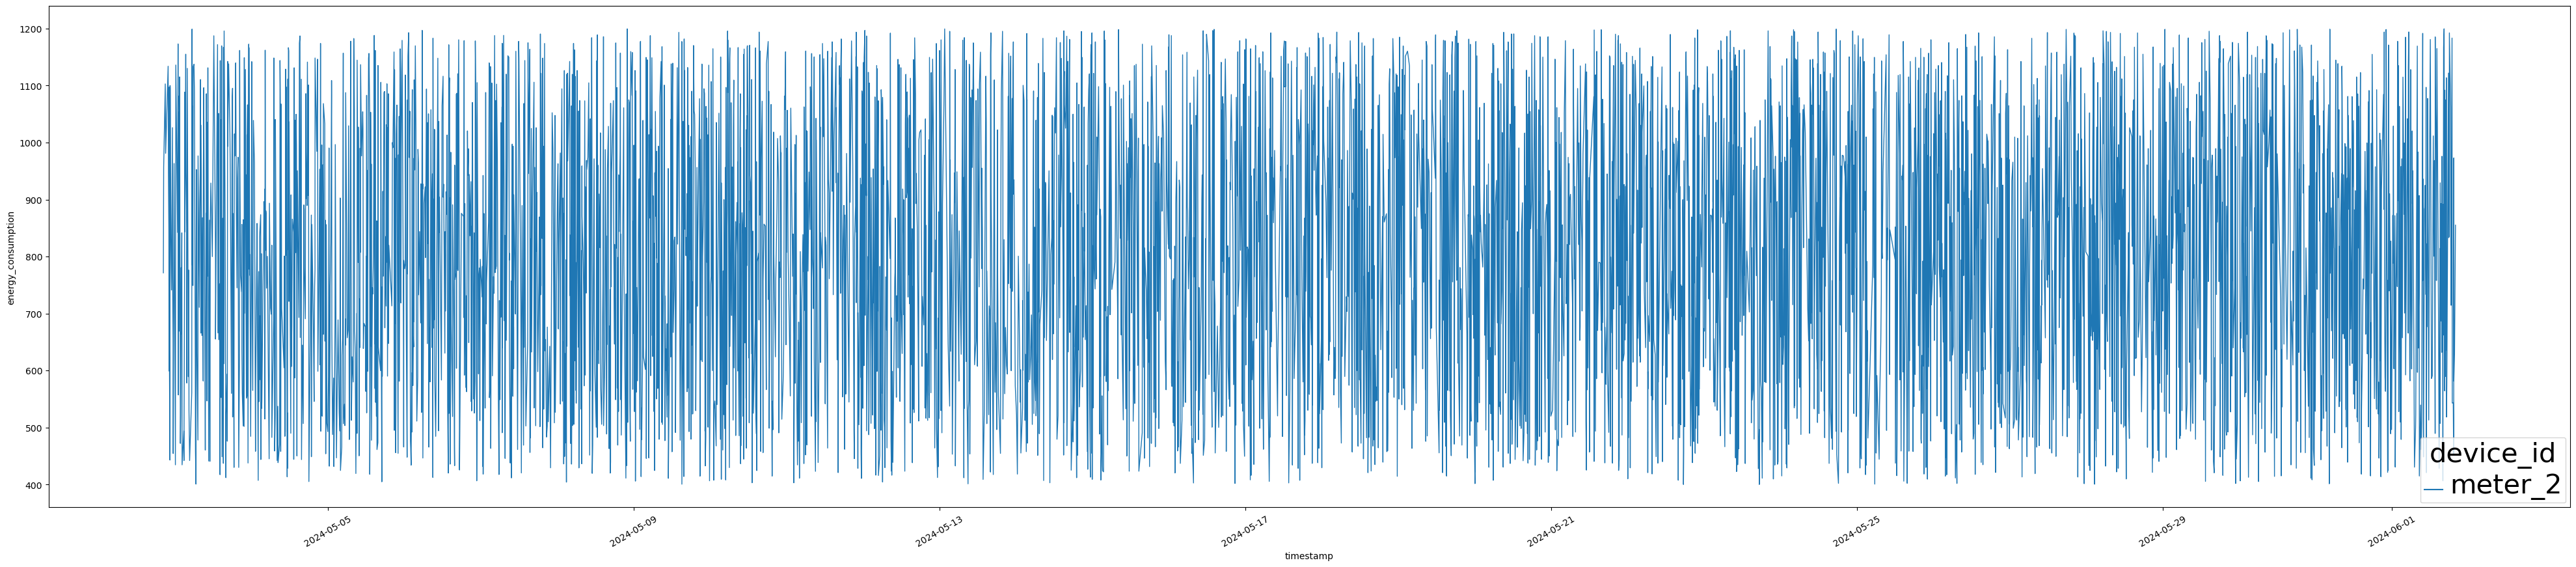

In [31]:
# Create a line plot using SNS
if development == 'local':
    plt.figure(figsize=(50,10))
    plt.xticks(rotation=30)
    ax=sns.lineplot(data=df_filtered, x="timestamp", y=graph_param,legend="full",hue='device_id',linewidth=1)
    # for legend text
    plt.setp(ax.get_legend().get_texts(), fontsize='30')  
 
    # for legend title
    plt.setp(ax.get_legend().get_title(), fontsize='30')  
    plt.show()

In [42]:
# Create a line plot using plotly
if development == 'local':
    line_trace = go.Scatter(
        x=df_filtered['timestamp'],
        y=df_filtered[graph_param],
        mode='lines',  # 'lines' for a line graph, 'lines+markers' to include markers
        name='{graph_param} over Time')
    # Plotting the line graph
    fig = go.Figure(data=[line_trace])
    # Display the plot
    pio.show(fig)

In [43]:
energy = plotly.offline.plot([go.Scatter(x=df_filtered['timestamp'], y=df_filtered[graph_param])],
                 output_type='div',
                include_plotlyjs=False)

In [44]:
energy_plotly = f'{energy}'
restworkflowcontext.outPlotly(title="Line plot of {graph_param}", text = energy_plotly)

''